In [4]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset ('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime (df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x : ast.literal_eval(x)if pd.notna(x) else x)

In [5]:
df_skills= df.copy()
df_skills= df_skills.explode('job_skills')
skills_count=df_skills.groupby(['job_skills','job_title_short']). size()
df_skills_counts= skills_count.reset_index(name='skill_count')
df_skills_counts= df_skills_counts.sort_values(by='skill_count', ascending=False)


df_skills_counts

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
1723,shogun,Business Analyst,1
447,delphi,Senior Data Scientist,1
2124,visualbasic,Software Engineer,1
450,digitalocean,Business Analyst,1


In [6]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

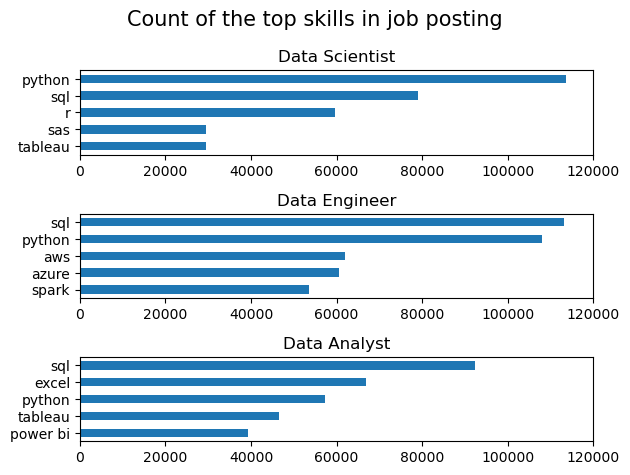

In [16]:
fig, ax = plt.subplots(3, 1)

for i,job_title in enumerate (job_titles):
     df_plot= df_skills_counts[df_skills_counts['job_title_short']==job_title]. head(5)
     df_plot.plot(kind='barh', x = 'job_skills', y='skill_count', ax=ax[i], title= job_title)
     ax[i]. invert_yaxis()
     ax[i]. set_ylabel('')
     ax[i].legend().set_visible(False)
     ax[i].set_xlim(0, 120000)
     
fig.suptitle('Count of the top skills in job posting', fontsize=15) 
fig.tight_layout()